In [237]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [238]:
%matplotlib inline

### Heteroskedastic

In [239]:
x.shape

(10,)

In [411]:
beta1 = 0.3
beta2 = 2
x = np.arange(1, 10, 1)
means = np.exp(beta1*x)
thetas = np.exp(beta2*x)
y = stats.nbinom.rvs(*convert_params(means, thetas), size=(10000, x.shape[0]))
x = np.tile(x, (1, 10000)).reshape(-1)
y = y.reshape(-1)

In [412]:
data = pd.DataFrame()
data['x'] = x
data['y'] = y

In [413]:
def convert_params(mu, theta):
    """
    Convert mean/dispersion parameterization of a negative binomial to the ones scipy supports

    See https://en.wikipedia.org/wiki/Negative_binomial_distribution#Alternative_formulations
    """
    r = theta
    var = mu + 1 / r * mu ** 2
    p = (var - mu) / var
    return r, 1 - p


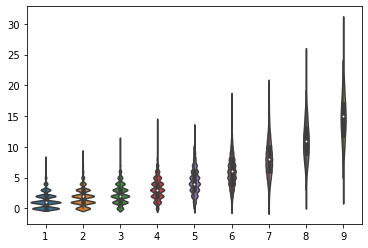

In [414]:
sns.violinplot(
pd.Series(x),
y.reshape(-1))

In [415]:
((y - np.exp(beta1*x))*x).mean()

0.0032011635662350752

In [416]:
a = np.arange(0.1, 10, 0.01)
b = a + 5*a**2

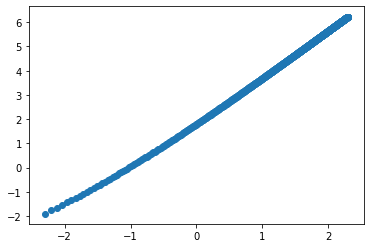

In [303]:
plt.scatter(np.log(a), np.log(b))

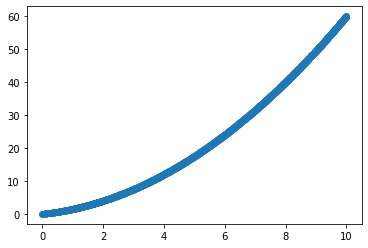

In [283]:
plt.scatter(a, b)

### Binomial beta case

In [4]:
p = 0.1

In [35]:
distances = []
Ns = np.arange(5, 5000, 1)

for N in Ns:
    
    binom_x = np.arange(0, N, 1)
    binom_y = stats.binom.pmf(np.arange(0, N, 1), N, p)
    binom_x = binom_x / N
    binom_y = binom_y * N
    
    beta_x = binom_x
    beta_y = stats.beta.pdf(beta_x, N*p, N*(1-p))
    
    
    
    distances.append(((binom_y - beta_y)**2).mean())

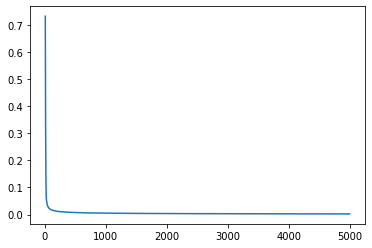

In [36]:
plt.plot(Ns, distances)

In [37]:
distances[-1:]

[0.002242356154609695]

In [77]:
N = 1000
p = 0.5

In [78]:
binom_x = np.arange(0, N, 1)
binom_y = stats.binom.pmf(np.arange(0, N, 1), N, p)
binom_x = binom_x / N
binom_y = binom_y * N

In [100]:
p = 0.1
noise_level = 0.2049755522580501
p_sq = (noise_level+1)*p**2

In [101]:
m = p
v = p_sq - p**2

In [102]:
v

0.0020497555225805018

In [103]:
m*(1-m)

0.09000000000000001

In [104]:
alpha = m*(m*(1-m)/v - 1)
beta = (1-m)*(m*(1-m)/v - 1)

In [105]:
qs = stats.beta.rvs(alpha, beta, size=10000)

In [106]:
qs.var()

0.002001210874947601

(0, 1)

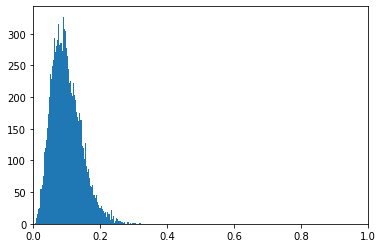

In [107]:
plt.hist(qs, bins=100);
plt.xlim(0, 1)

(0, 1)

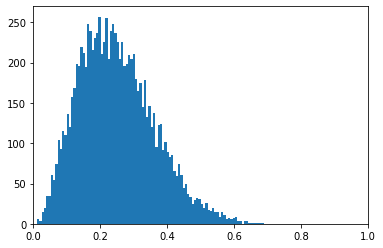

In [76]:
plt.hist(qs, bins=100);
plt.xlim(0, 1)

1000


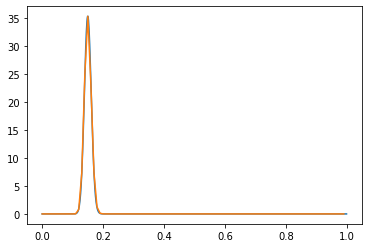

In [31]:
plt.plot(binom_x, binom_y)
print(N)


plt.plot(np.arange(0, 1, 0.01), stats.beta.pdf(np.arange(0, 1, 0.01), N*p, N*(1-p)))

25


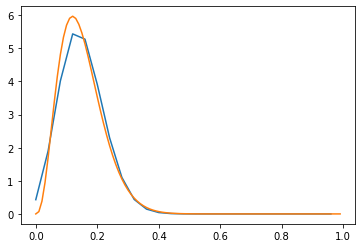

In [28]:
plt.plot(binom_x, binom_y)
print(N)
plt.plot(np.arange(0, 1, 0.01), stats.beta.pdf(np.arange(0, 1, 0.01), N*p, N*(1-p)))

10


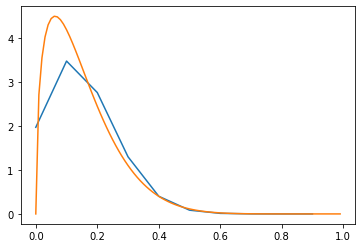

In [20]:
plt.plot(binom_x, binom_y)
print(N)
plt.plot(np.arange(0, 1, 0.01), stats.beta.pdf(np.arange(0, 1, 0.01), N*p, N*(1-p)))

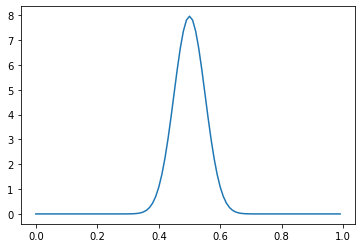

In [14]:
plt.plot(np.arange(0, 1, 0.01), stats.beta.pdf(np.arange(0, 1, 0.01), N*p, N*(1-p)))

### Computing ASL

In [63]:
a = stats.norm.rvs(loc=-3.5, size=5000)
b = stats.norm.rvs(loc=3.5, size=5000)

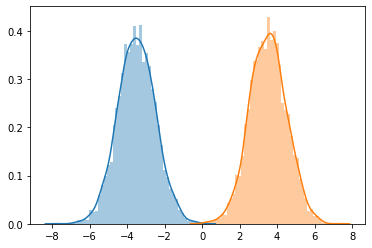

In [64]:
sns.distplot(a)
sns.distplot(b)

In [65]:
import itertools

In [66]:
sig = 0

In [70]:
%%time
(np.array([(x-y) for x,y in itertools.product(a,b)]) > 0).sum()

CPU times: user 5.67 s, sys: 949 ms, total: 6.62 s
Wall time: 6.61 s


4

In [71]:
%%time
sig = 0
for x, y in itertools.product(a,b):
    
    if x > y:
        sig += 1
print(sig)

4
CPU times: user 3.66 s, sys: 13.2 ms, total: 3.68 s
Wall time: 3.69 s


In [51]:
np.array([(x-y) for x,y in itertools.product(a,b)]) > 0)

KeyboardInterrupt: 